# IMPORT LIBRARIES

In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
 

In [3]:
#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,ElasticNet
#model selection
from sklearn.model_selection import train_test_split,cross_validate

In [4]:
#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn import linear_model

In [5]:
from scipy import stats
from scipy.stats import norm, skew   # specifically for staistic

# DATA DISCOVERY & EDA

In [6]:
train=pd.read_csv('C:/Users/User/Downloads/train (1).csv')
test=pd.read_csv('C:/Users/User/Downloads/test (1).csv')

In [7]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
train.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
train.info()
#We Have A Lot Of Nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
train.describe() 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# DUPLICATION

In [9]:
# 1.DUPLICATION

display(train.duplicated().sum())

# No duplicate items in the dataset

0

# NULLS

In [10]:
# 2.NULL VALUES

pd.set_option('display.max_rows',10)
display(train.isnull().sum())

# we Found That There are many nulls

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

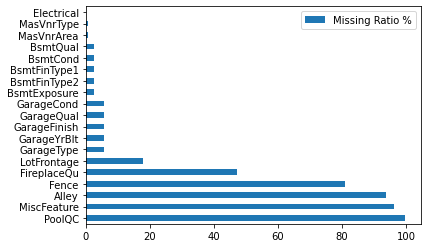

In [11]:
# Nulls Search By Simple Graph
#Check Null % In Each Column By If Function to Draw in case of exist and else in case of no nulls will use else to check after handle nulls

def plot_nas(train: pd.DataFrame):
    if train.isnull().sum().sum() != 0:
        na_df = (train.isnull().sum() / len(train)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')
plot_nas(train)

# So we Will Replace All Nulls with Mean or mode Except Last 4 Cols

In [12]:
# nan table
missing_values = [nan for nan in train.columns if train[nan].isnull().mean() > 0]

# Transform the array into a dataframe.
non_values = train[missing_values].isnull().mean()
non_values = pd.DataFrame(non_values.reset_index())

# Add column names to the dataframe.
non_values.columns = ['Column', 'Null %']

# Showing dtype
data_type = [train[i].dtype for i in non_values['Column']]
non_values['Data type'] = data_type

# Transform into a percentage
non_values['Null %'] = (non_values['Null %'] * 100).round(decimals = 2)

# Order the dataframe according to proportion of na per variable.
color = sns.light_palette("pink", as_cmap=True)
non_values.sort_values('Null %', ascending=False, inplace=True)
non_values.style.background_gradient(cmap=color)

,Column,Null %,Data type
16,PoolQC,99.520000,object
18,MiscFeature,96.300000,object
1,Alley,93.770000,object
17,Fence,80.750000,object
10,FireplaceQu,47.260000,object
0,LotFrontage,17.740000,float64
11,GarageType,5.550000,object
12,GarageYrBlt,5.550000,float64
13,GarageFinish,5.550000,object
14,GarageQual,5.550000,object


In [13]:
# dropping anything with greater than 50% missing from the dataset
unwanted_col = []

for i in non_values['Null %']:
    if i > 50:
        index = non_values.loc[non_values['Null %'] == i].index
        col_name = non_values['Column'][index]
        train.drop(columns=col_name, inplace=True)
        test.drop(columns=col_name, inplace=True)
        
# revisiting the nan table
missing_values = [nan for nan in train.columns if train[nan].isnull().mean() > 0]

# Transform the array into a dataframe.
non_values = train[missing_values].isnull().mean()
non_values = pd.DataFrame(non_values.reset_index())

# Add column names to the dataframe.
non_values.columns = ['Column', 'Null %']

# Showing dtype
data_type = [train[i].dtype for i in non_values['Column']]
non_values['Data type'] = data_type

# Transform into a percentage
non_values['Null %'] = (non_values['Null %'] * 100).round(decimals = 2)

# Order the dataframe according to proportion of na per variable.
color = sns.light_palette("pink", as_cmap=True)
non_values.sort_values('Null %', ascending=False, inplace=True)
non_values.style.background_gradient(cmap=color)

,Column,Null %,Data type
9,FireplaceQu,47.260000,object
0,LotFrontage,17.740000,float64
10,GarageType,5.550000,object
11,GarageYrBlt,5.550000,float64
12,GarageFinish,5.550000,object
13,GarageQual,5.550000,object
14,GarageCond,5.550000,object
5,BsmtExposure,2.600000,object
7,BsmtFinType2,2.600000,object
3,BsmtQual,2.530000,object


In [22]:
#Before imputing missing values, we try to find out which value should be used to replace them by defining a function

''''def diagnostic_plots(train, variable):
    # The function takes a dataframe (df) and
    # the variable of interest as arguments.
    
    print(f'Visualisation for {variable}\n')
    
    # Define figure size.
    plt.figure(figsize=(20, 5),dpi=100)

    # KDE
    plt.subplot(1, 2, 1)
    sns.despine()
    sns.kdeplot(data=train, x="SalePrice", hue=variable, palette="Set1")
    sns.kdeplot(train[train[variable].isnull()]['SalePrice'], color='black')
    plt.title('KDE')
    
    # ascending
    large_to_small = train.groupby(variable).size().sort_values().index[::-1]
    
    # Countplot
    plt.subplot(1, 2, 2)
    sns.despine()
    sns.countplot(data=train, x=train[variable], order=large_to_small, palette="Set1")
    plt.title('Count Plot')
    
    plt.show()
    print(f'Black for KDE is missing values\n')
    print(f"Missing values make up : {train[variable].isnull().sum()/len(train[variable])*100:.3}% of this dataset\n")
    print(f"The mode is : {train[variable].mode()[0]}\n")
    print('_ ' * 40)
    print('_ ' * 40)
    print(f"\n")

    
# visually analysing the object columns
for i in train.columns:
    if train[i].dtype == object and train[i].isnull().sum() > 0:
        diagnostic_plots(train, i)

In [14]:
# Imputing missing values of 'object' datatype.

#  MasVnrType
train['MasVnrType'] = train['MasVnrType'].fillna('BrkFace')
test['MasVnrType'] = test['MasVnrType'].fillna('BrkFace')

# GarageFinish
train['GarageFinish'] = train['GarageFinish'].fillna('Detchd')
test['GarageFinish'] = test['GarageFinish'].fillna('Detchd')

# FireplaceQu
train['FireplaceQu'] = train['FireplaceQu'].fillna('Unknown')
test['FireplaceQu'] = test['FireplaceQu'].fillna('Unknown')

# filling the rest with mode
for i in train.columns:
    if train[i].dtype == object:
        # mode
        mode = train[i].mode()
        # filling with mode
        train[i] = train[i].fillna(mode[0])
        test[i] = test[i].fillna(mode[0])



In [15]:
# revisiting the nan table
missing_values = [nan for nan in train.columns if train[nan].isnull().mean() > 0]

# Transform the array into a dataframe.
non_values = train[missing_values].isnull().mean()
non_values = pd.DataFrame(non_values.reset_index())

# Add column names to the dataframe.
non_values.columns = ['Column', 'Null %']

# Showing dtype
data_type = [train[i].dtype for i in non_values['Column']]
non_values['Data type'] = data_type

# Transform into a percentage
non_values['Null %'] = (non_values['Null %'] * 100).round(decimals = 2)

# Order the dataframe according to proportion of na per variable.
color = sns.light_palette("pink", as_cmap=True)
non_values.sort_values('Null %', ascending=False, inplace=True)
non_values.style.background_gradient(cmap=color)

,Column,Null %,Data type
0,LotFrontage,17.740000,float64
2,GarageYrBlt,5.550000,float64
1,MasVnrArea,0.550000,float64


In [16]:
# Now we deal with the remaining null values in our dataset, these values will be imputed with the median.
# Since we have outliers it is good to use median to replace missing values

# we will use the median to fill these null values
new_missing_values = []

for i in missing_values:
    if train[i].dtype == float:
        new_missing_values.append(i)
        
        # using median of train to fill na values (to avoid overfitting)
        median = train[i].median()
        
        # for illustrative purposes
        mean = train[i].mean()
        
        # filling na values with median
        train[f"{i}_median"] = train[i].fillna(median)
        test[f"{i}_median"] = test[i].fillna(median)
        
        # filling na values with mean
        train[f"{i}_mean"] = train[i].fillna(mean)
        test[f"{i}_mean"] = test[i].fillna(mean)
    else:
        continue


The top half is the Median and the bottom is the Mean.


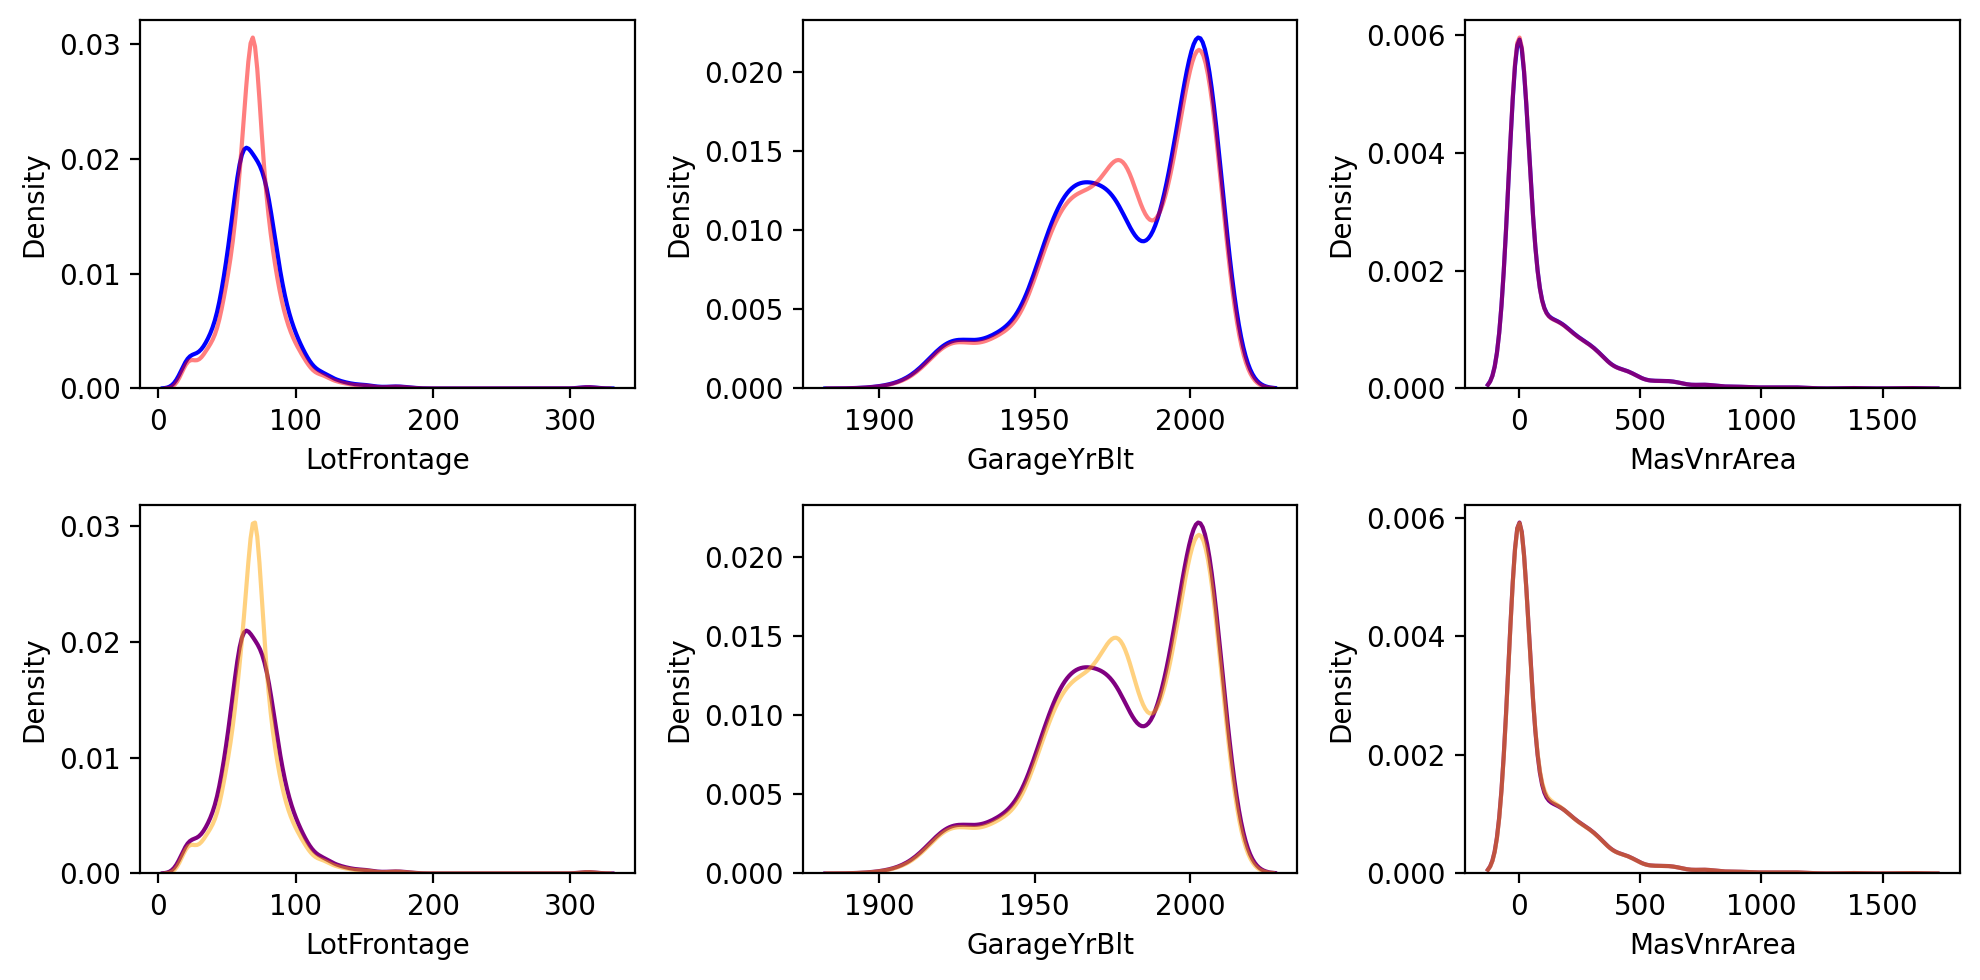

In [17]:
# MEAN VS MEDIAN REPLACEMENT

fig, ax = plt.subplots(2, 3,figsize=(10, 5),dpi=200)

print(f"\nThe top half is the Median and the bottom is the Mean.")


sns.kdeplot(train['LotFrontage'], x = 'SalePrice',color="blue", label='LotFrontage', ax=ax[0,0])
sns.kdeplot(train['LotFrontage_median'], x = 'SalePrice', color='red',label='LotFrontage_median', ax=ax[0,0], alpha=0.5)


sns.kdeplot(train['GarageYrBlt'], x = 'SalePrice', color="blue", label='GarageYrBlt', ax=ax[0,1])
sns.kdeplot(train['GarageYrBlt_median'], x = 'SalePrice', color='red',label='GarageYrBlt_median', ax=ax[0,1], alpha=0.5)


sns.kdeplot(train['MasVnrArea'], x = 'SalePrice', color="blue", label='MasVnrArea', ax=ax[0,2])
sns.kdeplot(train['MasVnrArea_median'], x = 'SalePrice', color='red',label='MasVnrArea_median', ax=ax[0,2], alpha=0.5)


sns.kdeplot(train['LotFrontage'], x = 'SalePrice',color="purple", label='LotFrontage', ax=ax[1,0])
sns.kdeplot(train['LotFrontage_mean'], x = 'SalePrice', color='orange',label='LotFrontage_mean', ax=ax[1,0], alpha=0.5)


sns.kdeplot(train['GarageYrBlt'], x = 'SalePrice', color="purple", label='GarageYrBlt', ax=ax[1,1])
sns.kdeplot(train['GarageYrBlt_mean'], x = 'SalePrice', color='orange',label='GarageYrBlt_mean', ax=ax[1,1], alpha=0.5)


sns.kdeplot(train['MasVnrArea'], x = 'SalePrice', color="purple", label='MasVnrArea', ax=ax[1,2])
sns.kdeplot(train['MasVnrArea_mean'], x = 'SalePrice', color='orange',label='MasVnrArea_mean',ax=ax[1,2], alpha=0.5)

plt.tight_layout()
plt.show()


In [18]:
# filling na with median TRAIN


train['LotFrontage'] = train['LotFrontage_median']
train['GarageYrBlt'] = train['GarageYrBlt_median']
train['MasVnrArea'] = train['MasVnrArea_median']

# dropping columns
train.drop(columns=['LotFrontage_median','GarageYrBlt_median', 'MasVnrArea_median',
                    'LotFrontage_mean', 'GarageYrBlt_mean', 'MasVnrArea_mean'], inplace= True)

# dropping columns
test.drop(columns=['LotFrontage_median','GarageYrBlt_median', 'MasVnrArea_median',
                    'LotFrontage_mean', 'GarageYrBlt_mean', 'MasVnrArea_mean'], inplace= True)


for i in test.columns:
    if test[i].dtype == float:
        test[i] = test[i].fillna(train[i].median())

In [19]:
#Final check for missing values

display(train.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64

In [20]:
def plot_nas(train: pd.DataFrame):
    if train.isnull().sum().sum() != 0:
        na_df = (train.isnull().sum() / len(train)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No Nulls found')
plot_nas(train)

No Nulls found


In [ ]:
Finally we have no null values in our dataset.

# OUTLIERS

In [21]:
def diagnostic_plots(df, variable):
    
    # Define figure size.
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    
    plt.tight_layout()
    plt.show()

LotFrontage Outlier visualisation
Correlation w/ SalePrice : 0.33477085313976 


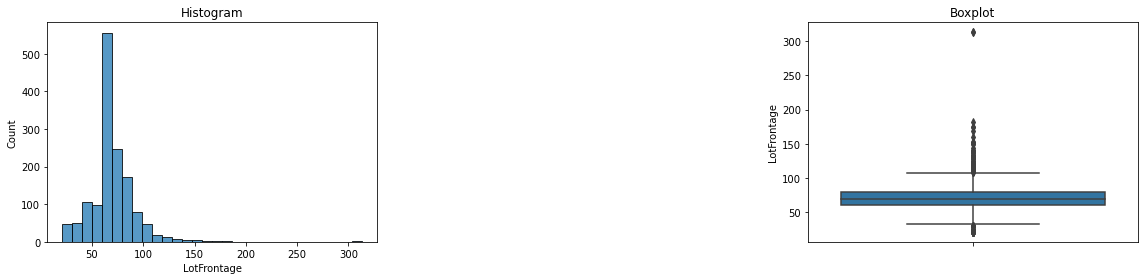

MasVnrArea Outlier visualisation
Correlation w/ SalePrice : 0.47261449900457436 


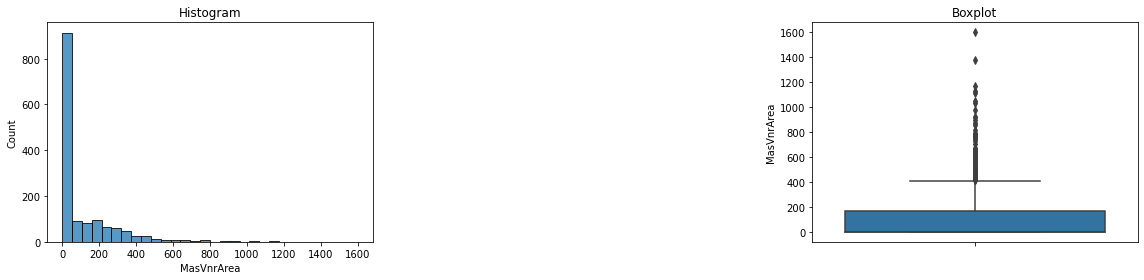

GarageYrBlt Outlier visualisation
Correlation w/ SalePrice : 0.4667536523633397 


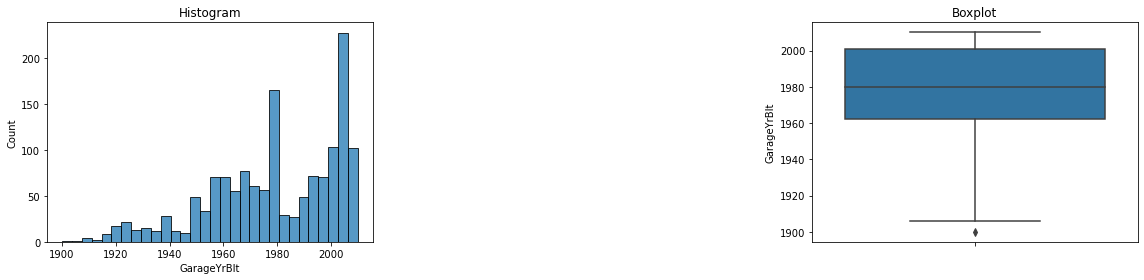

In [22]:
for i in train.columns:
    if train[i].dtype == int or train[i].dtype == float:
        print(f"{i} Outlier visualisation")
        print(f"Correlation w/ SalePrice : {train['SalePrice'].corr(train[i])} ")
        diagnostic_plots(train, i)

In [23]:
!pip install feature_engine

In [24]:
from feature_engine.outliers import Winsorizer

# We Need To Get Upper & Lower Limits To Identify OutLiers Then Eliminate them.

def find_boundaries(df, variable):

    # the boundaries are the quantiles

    lower_boundary = df[variable].quantile(0.05)
    upper_boundary = df[variable].quantile(0.95)

    return upper_boundary, lower_boundary

In [25]:
outliers = ['MSSubClass',
'LotFrontage',
'LotArea',
'OverallCond',
'MasVnrArea',
'BsmtFinSF1',
'BsmtFinSF2',
'BsmtUnfSF',
'TotalBsmtSF',
'1stFlrSF',
'LowQualFinSF',
'GrLivArea',
'BsmtHalfBath',
'BedroomAbvGr',
'KitchenAbvGr',
'TotRmsAbvGrd',
'WoodDeckSF',
'OpenPorchSF',
'EnclosedPorch',
'3SsnPorch',
'ScreenPorch',
'PoolArea',
'MiscVal',
'MoSold']

In [26]:
for i in outliers:
    # finding the outliers
    upper_limit, lower_limit = find_boundaries(train, i)

    # Now replacing the outliers by the maximum and minimum limit
    train[i] = np.where(train[i] > upper_limit, upper_limit,
                           np.where(train[i] < lower_limit, lower_limit, train[i]))
    test[i] = np.where(test[i] > upper_limit, upper_limit,
                       np.where(test[i] < lower_limit, lower_limit, test[i]))

In [27]:
dummy_col = [i for i in train.columns if train[i].dtype == object]

# creating dummies
pd.concat([train[dummy_col], pd.get_dummies(train[dummy_col])], axis=1)
pd.concat([test[dummy_col], pd.get_dummies(train[dummy_col])], axis=1)

# dropping 
train.drop(columns=dummy_col, inplace=True)
test.drop(columns=dummy_col, inplace=True)

# CORRELATION

In [28]:
cor_mat= train[:].corr()
cor_with_tar=cor_mat.sort_values(['SalePrice'],ascending=False)

In [29]:
print("The most relevant features (numeric) for the target are :")
cor_with_tar.SalePrice

The most relevant features (numeric) for the target are :


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.696737
GarageCars      0.640409
TotalBsmtSF     0.626933
                  ...   
LowQualFinSF         NaN
KitchenAbvGr         NaN
3SsnPorch            NaN
PoolArea             NaN
MiscVal              NaN
Name: SalePrice, Length: 38, dtype: float64

In [ ]:
#INFERENCES--
#Note that some of the features have quite high corelation with the target. These features are really significant.

#Of these the features with corelation value >0.5 are really important. Some features like GrLivArea etc.. are even more important.

# REGRESSION ANALYSIS

In [30]:
#WITHOUT LOG

target = train['SalePrice']
features = train.drop('SalePrice', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    test_size=0.2, random_state=10)

regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

Training data r-squared: 0.8283727249656704
Test data r-squared: 0.8065587742635314


In [31]:
#WITH LOG

target = np.log(train['SalePrice']) # Use log prices
features = train.drop('SalePrice', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    test_size=0.2, random_state=10)

regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

Training data r-squared: 0.8859919287691609
Test data r-squared: 0.8870490608629695


In [32]:
y_pred = regr.predict(X_test)

<AxesSubplot:ylabel='SalePrice'>

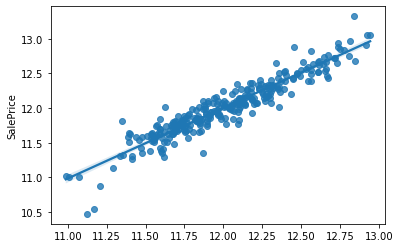

In [70]:
sns.regplot(y_pred,y_test)

In [33]:
# EVALUATION METRICS

import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Mean absolute error = 0.1
Mean squared error = 0.02
Median absolute error = 0.08
Explain variance score = 0.89
R2 score = 0.89


In [37]:
# POLYNOMIAL REGRESSION

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_train_poly, X_test_poly = poly_reg.fit_transform(X_train),poly_reg.fit_transform(X_test)

model=linear_model.LinearRegression()
model=model.fit(X_train_poly,y_train)


coefficient=model.coef_
model.intercept_

14085.525955471845

In [40]:
from sklearn.metrics import r2_score
pred=model.predict(X_test_poly)
r2_score(pred,y_test)

0.7737798716165435

In [ ]:
#RIDGE AND LASSO REGULARISATION

In [41]:
from sklearn.linear_model import (LinearRegression, Ridge, Lasso)

In [48]:
# create a lasso regressor
lasso = Lasso(alpha=0.00001, normalize=True)

# Fit the regressor to the data
lasso.fit(X_train,y_train)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

[ 4.36405222e-06 -3.16643043e-04  4.89475013e-04  8.53578157e-06
  8.01351693e-02  5.79080641e-02  2.95471382e-03  1.15051883e-03
 -3.31256537e-05  8.14325240e-05  1.32274959e-05 -0.00000000e+00
  1.70119954e-04  9.87069444e-05  1.51882098e-04  0.00000000e+00
  1.44020981e-04  2.12036077e-02  1.67787434e-05  2.64449734e-03
 -2.66086481e-03 -1.56388961e-02  0.00000000e+00  1.50577814e-03
  2.89124585e-02  1.35157345e-04  6.59979471e-02 -3.91311959e-05
  1.39129627e-04  7.98609375e-05  1.20448177e-04  0.00000000e+00
  3.70971684e-04  0.00000000e+00  0.00000000e+00 -3.95590755e-04
 -7.34611202e-03]


In [50]:
# Import the necessary module
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X_train, y_train, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

# find the mean of our cv scores here
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.87950769 0.8879178  0.87116249 0.85202553 0.88313658]
Average 5-Fold CV Score: 0.8747500196685415


In [52]:
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X_test, y_test, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

# find the mean of our cv scores here
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.88068649 0.89543099 0.85654442 0.89368136 0.79123149]
Average 5-Fold CV Score: 0.8635149494439457


In [65]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [66]:
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    
np.shape(coefs)


(100, 37)

In [68]:
ridge2 = Ridge(alpha = 4, normalize = True)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred2 = ridge2.predict(X_test)           # Use this model to predict the test data

print(mean_squared_error(y_test, pred2)) 

0.04823544049121505


In [69]:
ridge3 = Ridge(alpha = 10**10, normalize = True)
ridge3.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred3 = ridge3.predict(X_test)           # Use this model to predict the test data

print(mean_squared_error(y_test, pred3))          # Calculate the test MSE

0.17663583121401077


In [71]:
#Instead of arbitrarily choosing alpha  =4 , it would be better to use cross-validation to choose the tuning parameter alpha. We can do this using the cross-validated ridge regression function, RidgeCV().

ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.026683496156031508

In [72]:
ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(X_train, y_train)
mean_squared_error(y_test, ridge4.predict(X_test))

0.019571114854595978

In [59]:
 # Perform 10-fold CV: ridge_cv_scores
ridge_cv_scores = cross_val_score(ridge, X_train, y_train, cv=10)
print("ridge_cv_scores:",ridge_cv_scores)

ridge_cv_scores: [0.82037967 0.85963171 0.86720103 0.80454495 0.88751345 0.80280966
 0.82203312 0.82441795 0.86498766 0.8332324 ]
